# Mathematical Modelling for Sustainable Development
## Coursework Submission 2025
### Serena Farrelly

Question 2: Tipping points and the Greenland ice sheet

Modelling the interplay between global temperatures and albedo affect to predict the melting of the greenland icesheet.


### Modelling Assumptions

- parabolic ice sheet cross section

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# lets get some shit down

h = 3000        # height of ice sheeet (m)
P = 4           # precipitation rate (m/yr)
r = 1           # rate of melting (m/yr)
T_0 = 270       # pre-industrial surface temp (K)
d_T = 0         # change in temperature from global warming (function of t)
h_f = 0         # characteristic length, altitude above whcih the ice won't melt
F = 1           # rate of flow of ice sheet into the sea

# rate of change of height of ice sheet
def f(h, P, r, T_0, d_T, h_f, F):
    dh_dt = P - (r*(T_0+d_T))/(h+h_f)-(F*h)
    if h <= 0 and dh_dt < 0:
        dh_dt = 0
    return dh_dt


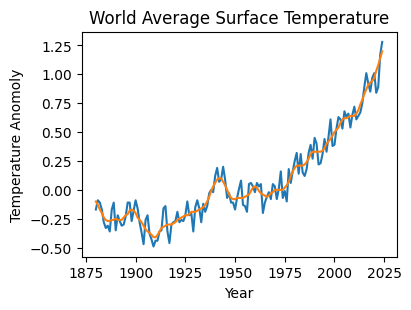

In [10]:
with open("temperature.txt", "r") as file:
    lines = file.readlines()  # Read all lines into a list

# get rid of initial headers
lines = lines[5:len(lines)]

# Process each line
data = [line.strip().split() for line in lines]  # Removes '\n' and splits by space
processed_data = [[int(line[0]), float(line[1]), float(line[2])] for line in data]

# putting into a np array
NASAtemp = np.array(processed_data)
# print(np.shape(NASAtemp))

fig = plt.figure(figsize=(9,3))
ax1 = fig.add_axes([0.10, 0.15, 0.35, 0.75])
ax1.plot(NASAtemp[:,0], NASAtemp[:,1])
ax1.plot(NASAtemp[:,0], NASAtemp[:,2])
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature Anomoly')
ax1.set_title('World Average Surface Temperature')
plt.show()

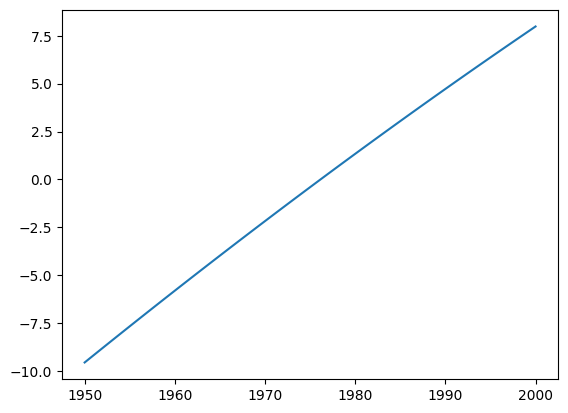

In [ ]:
# we also want how betastar changes with time
# assuming emissions increase linearly
gamma = 0.01           # rate of linear emissions (to be calibrated)
def get_E(t, gamma):
    E_1950 = 5.2e9      # CO2 emissions in 1950 (tonnes)
    E = gamma*(t-1950)+E_1950
    return E

t = np.linspace(1950, 2000, 100)
# E_arr = np.array([])
E_arr = get_E(t, gamma)

## need to check that this is ok to remain as annual emissions rather than cumulative CO2 levels

# how emissions relate to CO2 air density
def drho_dt(E, rho):
    kappa = 0.05            # coefficient (to be calibrated)
    t_CO2 = 100             # life span of CO2 in atmosphere (years)
    rho_1950 = 315          # technically 1959 (ppm)
    return kappa*E - (1/t_CO2)*(rho-rho_1950)

rho_0 = 316             # initial condition
# integrate to find the CO2 air density at current emissions level (for the year)
rho = solve_ivp(drho_dt, [1950, 2000], [rho_0], t_eval=t)
# print(rho)

# how CO2 air density relates to betastar
G = (1/315)*0.01               # proportionality constant (to be calibrated)
# calibration philosophy: they be smol (<0.1)
betastar = G*rho.y[0]          # array of man-made greenhouse effect values

# print(betastar)

def T(betastar, T_0):
    alpha = 0.3         # albedo effect
    beta = 0.4          # greenhouse effect
    sigma = 5.67e-8     # Stefan-Boltzmann constant
    R_in = 340          # incoming solar energy (W/m^2)
    d_T = T_0 - ((1-alpha)*R_in / (1-(beta+betastar))/sigma)**0.25
    return d_T


T_0 = 300               # initial condition
d_T_arr = T(betastar, T_0)
# print(d_T_arr)

plt.plot(t,d_T_arr)
plt.show()